In [1]:
# Horray libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.linear_model import LogisticRegression

In [2]:
'''data_dir = tf.keras.utils.get_file('touch_photos', origin=google_path, untar=True)
data_dir = pathlib.Path(data_dir)'''

"data_dir = tf.keras.utils.get_file('touch_photos', origin=google_path, untar=True)\ndata_dir = pathlib.Path(data_dir)"

In [3]:
batch_size = 32
img_height = 180
img_width = 180

In [15]:
# Model building
def initialize_model():
    num_classes = 2

    model = Sequential([
      layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
      layers.Conv2D(16, 3, padding='same', activation='relu'),
      layers.MaxPooling2D(),
      layers.Conv2D(32, 3, padding='same', activation='relu'),
      layers.MaxPooling2D(),
      layers.Conv2D(64, 3, padding='same', activation='relu'),
      layers.MaxPooling2D(),
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dense(num_classes),
      layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                  metrics=['accuracy'])
    return model


In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

In [7]:
# Load data from csv
import pandas as pd
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Unpack dataframe to list
image = train_df['image'].tolist()
label = train_df['label'].tolist()
train_list = []
train_list.append(image)
train_list.append(label)

image = test_df['image'].tolist()
label = test_df['label'].tolist()
test_list = []
test_list.append(image)
test_list.append(label)

In [8]:
# Train Test Split
X_train, y_train = train_list
X_test, y_test = test_list

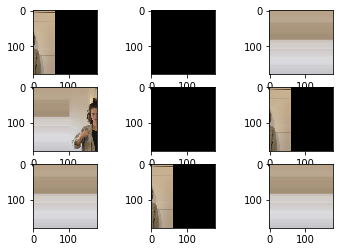

In [9]:
# horizontal shift image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

# load the image
img = load_img('_data/_bylabel/_train/0/vlcsnap-2020-12-04-17h06m03s528.png')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[100,800])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()


In [52]:
img = train.take(1)
im = list(img)[0][0][0]
im = np.array(im)
im = im.astype('uint8')
from PIL import Image
img = Image.fromarray(im, 'RGB')
img.show()
im

array([[[192, 186, 177],
        [192, 186, 177],
        [193, 187, 178],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[192, 186, 177],
        [192, 186, 177],
        [193, 187, 178],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[191, 185, 176],
        [192, 186, 178],
        [192, 186, 178],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[187, 191, 195],
        [193, 197, 201],
        [190, 194, 198],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[187, 191, 195],
        [194, 198, 202],
        [190, 194, 198],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[184, 188, 192],
        [194, 198, 202],
        [190, 194, 198],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [47]:
model = initialize_model()

random = tf.keras.preprocessing.image_dataset_from_directory(
    '_data/_random/_train', 
    batch_size=32, 
    image_size=(180, 180), 
    shuffle=True, 
    validation_split=None,
)
model.fit(
    train,
    epochs=3
)


Found 3383 files belonging to 2 classes.
Epoch 1/3
105/105 [==============================] - 27s 256ms/step - loss: 0.0370 - accuracy: 0.9812
Epoch 2/3
105/105 [==============================] - 27s 253ms/step - loss: 1.6989e-08 - accuracy: 1.0000
Epoch 3/3
105/105 [==============================] - 27s 253ms/step - loss: 1.0201e-08 - accuracy: 1.0000


In [10]:

# PROTOTYPE for Processing

train = tf.keras.preprocessing.image_dataset_from_directory(
    '_data/_bylabel/_train', 
    batch_size=32, 
    image_size=(180, 180), 
    shuffle=True, 
    validation_split=None,
)

test = tf.keras.preprocessing.image_dataset_from_directory(
    '_data/_bylabel/_test', 
    batch_size=32, 
    image_size=(180, 180), 
    shuffle=False, 
    validation_split=None,
)
model.fit(
    train,
    validation_data=test,
    epochs=3
)
test_preds = model.predict(test)
# test_preds.to_csv(ideally with image names, definately with the actual labels)
train_preds = model.predict(train)
# train_preds.to_csv(ideally with image names, definately with the actual labels)


Found 3354 files belonging to 2 classes.
Found 502 files belonging to 2 classes.
Epoch 1/3
105/105 [==============================] - 28s 267ms/step - loss: 0.0557 - accuracy: 0.9806 - val_loss: 3.8992e-07 - val_accuracy: 1.0000
Epoch 2/3
105/105 [==============================] - 28s 266ms/step - loss: 9.5111e-08 - accuracy: 1.0000 - val_loss: 2.7356e-07 - val_accuracy: 1.0000
Epoch 3/3
105/105 [==============================] - 28s 264ms/step - loss: 6.7175e-08 - accuracy: 1.0000 - val_loss: 2.0517e-07 - val_accuracy: 1.0000


In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

NameError: name 'train_ds' is not defined

<Figure size 720x720 with 0 Axes>

In [ ]:
model.predict(test).mean(axis=0)

In [ ]:
check = tf.keras.preprocessing.image_dataset_from_directory(
    '_data/_random', 
    batch_size=32, 
    image_size=(180, 180), 
    shuffle=False, 
    validation_split=None)

In [ ]:
model.evaluate(check)

In [ ]:
model.evaluate(train)

['_GeneratorState',
 '__abstractmethods__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_add_variable_with_custom_getter',
 '_apply_options',
 '_as_serialized_graph',
 '_batch_size',
 '_checkpoint_dependencies',
 '_consumers',
 '_deferred_dependencies',
 '_drop_remainder',
 '_flat_shapes',
 '_flat_structure',
 '_flat_types',
 '_functions',
 '_gather_saveables_for_checkpoint',
 '_graph',
 '_graph_attr',
 '_handle_deferred_dependencies',
 '_has_captured_ref',
 '_input_dataset',
 '_inputs',
 '_list_extra_dependencies_for_serialization',
 '_list_functions_for_serialization',
 '_lookup_de

In [ ]:
# Image classification using TensorFlow

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
path = '_data/_bylabel/_train'
data_dir = path
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.01,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.01,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

In [ ]:
class_names = train_ds.class_names
print(class_names)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
c

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
epochs=10
history = model.fit(
  train_list,
  validation_data=val_ds,
  epochs=epochs
)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
validation_dataset = train

val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

In [ ]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [ ]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [ ]:
rescale = tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)